In [1]:
from dicke_h import *
from ops_h import *
from matplotlib import pyplot as plt
from qutip.visualization import hinton

In [19]:
## Lindblad dynamics coefficients

# gE = nonradiative emission coefficient
# gD = dephasing coefficient
# gP = incoherent pumping coefficient
# gCE = collective emission coefficient
# gCD = collective dephasing
# gCP = collective pumping coefficient

N = 60
nds = num_dicke_states(N)
gE = 0.1
gD = 0.3
gP = 0
gCE = 1
gCD = 0
gCP = 0
w0 = 1
h0 = w0 * jz_op(N)

In [20]:
time_steps = 201
superradiant_delay = np.log(N)/(gCE * N)
time_factor = 20
t = np.linspace(0, time_factor * superradiant_delay, time_steps)

In [21]:
pim = Dicke(N = N, 
          emission = gCE, 
          hamiltonian = h0, 
          loss = gE, 
          dephasing = gD, 
          pumping = gP, 
          collective_pumping = gCP, 
          collective_dephasing = gCD)

In [22]:
excited_state = pim.dicke(N/2,N/2)
ground_state = pim.dicke(N/2,-N/2)
superradiant_state = pim.dicke(N/2,0 + 0.5*(N%2))
subradiant_state = pim.dicke(0.5*(N%2), -0.5*(N%2))
single_photon_state = pim.dicke(N/2,-N/2+1)
ghz_state = pim.ghz()
ground_coefficient = 1/np.sqrt(2)
excited_coefficient = 1/np.sqrt(2)
separable_state = pim.css_ab(ground_coefficient, excited_coefficient)
plus_state = pim.css_plus()
minus_state = pim.css_minus()
th = 0
if th == 1 :
    T = 1
    x = 0.4
    w0 = x * T * constants.Boltzmann / constants.hbar
    pim.w0 = w0
    print(int(np.log10(w0)))
    thermal_state = pim.thermal(T)

In [23]:
initial_state = excited_state

In [24]:
result = pim.solve(initial_state, t)

hamiltonian and rho_0 are diagonal: fast solver


In [25]:
rho_t = result.states

In [ ]:
fig, ax = hinton(initial_state) # xlabels=xlabels, ylabels=xlabels)
plt.show()
plt.close()

rho_tend = rho_t[-1].tidyup()
fig2, ax = hinton(rho_tend) # xlabels=xlabels, ylabels=xlabels)
plt.show()
plt.close()

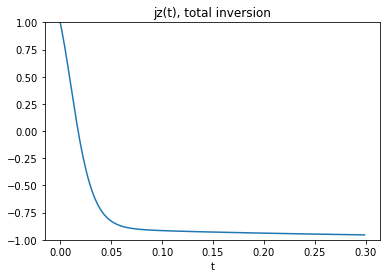

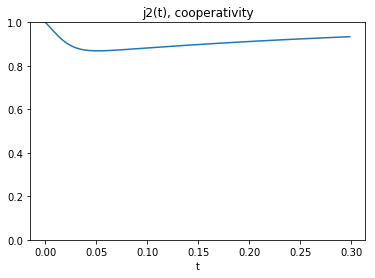

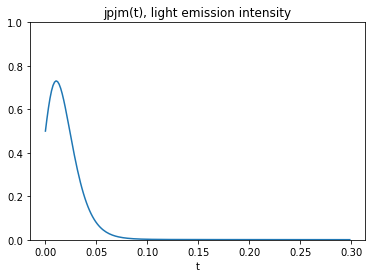

In [11]:
v_t = qobj_to_jm(rho_t)

j2max = (N/2*(N/2 + 1))
jmax = N/2

jzt_jmm = jzn_t(v_t, 1)
jpjmt_jmm = jpn_jzq_jmn_t(v_t, 1,0)
j2t_jmm = j2n_t(v_t, 1)

fig3 = plt.figure()
plt.plot(t/time_factor, jzt_jmm/jmax)
plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig4 = plt.figure()
plt.plot( t/time_factor, j2t_jmm/j2max)
plt.ylim([0,1])
plt.title('j2(t), cooperativity')
plt.xlabel('t')
plt.show()
plt.close()

fig5 = plt.figure()
plt.plot( t/time_factor, jpjmt_jmm/j2max)
plt.ylim([0,1])
plt.title('jpjm(t), light emission intensity')
plt.xlabel('t')
plt.show()
plt.close()

In [12]:
rho_t[-1].tidyup().norm()

0.99999999999949163

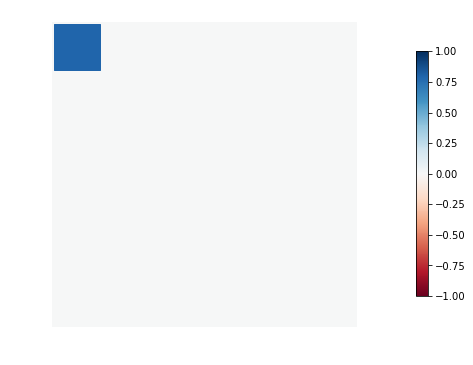

In [13]:
fig, ax = hinton(initial_state[:N,:N]) # xlabels=xlabels, ylabels=xlabels)
plt.show()
plt.close()

In [17]:
[J2, Jx, Jy, Jz, Jp, Jm] = reduced_algebra(N)
jzt_reduced = np.zeros(len(rho_t))
j2t_reduced = np.zeros(len(rho_t))
jpjmt_reduced = np.zeros(len(rho_t))

for i in range(len(rho_t)):
    jzt_reduced[i] = (rho_t[i]*Jz).tr()
    j2t_reduced[i] = (rho_t[i]*J2).tr()
    jpjmt_reduced[i] = (rho_t[i]*Jp*Jm).tr()

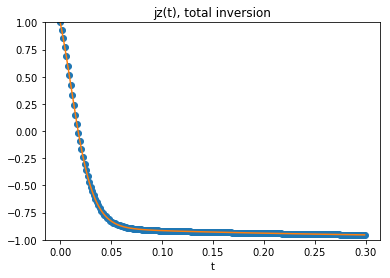

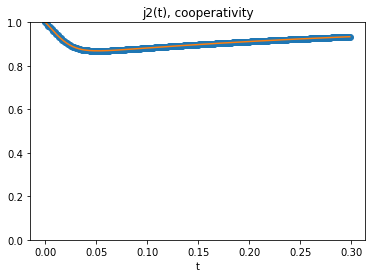

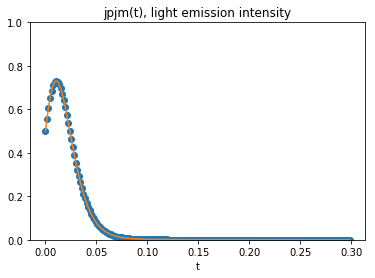

In [18]:
fig6 = plt.figure()
plt.plot(t/time_factor, jzt_jmm/jmax, 'o', t/time_factor, jzt_reduced/jmax)
plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig7 = plt.figure()
plt.plot( t/time_factor, j2t_jmm/j2max, 'o', t/time_factor, j2t_reduced/j2max)
plt.ylim([0,1])
plt.title('j2(t), cooperativity')
plt.xlabel('t')
plt.show()
plt.close()

fig8 = plt.figure()
plt.plot( t/time_factor, jpjmt_jmm/j2max, 'o', t/time_factor, jpjmt_reduced/j2max)
plt.ylim([0,1])
plt.title('jpjm(t), light emission intensity')
plt.xlabel('t')
plt.show()
plt.close()